# Portfolio allocation

## Import packages
The basic packages like Pandas will be imported. Along with it, the Quandl package is imported to get the data.

In [1]:
import pandas as pd
import quandl
import matplotlib.pyplot as plt
%matplotlib inline

## Data
The start and end date is decided during which the data will be extracted and worked on.

In [2]:
start = pd.to_datetime('2014-01-01')
end = pd.to_datetime('2016-01-01')

Then the data of 3 companies are extracted. They are facebook, apple and twitter. The 11th column which is adjusted close is obtained since the analysis will be done using it.

In [3]:
fb = quandl.get('WIKI/FB.11',start_date=start, end_date=end)
twtr = quandl.get('WIKI/TWTR.11',start_date=start, end_date=end)
aapl = quandl.get('WIKI/AAPL.11',start_date=start, end_date=end)

In [4]:
fb.head()

,Adj. Close
Date,
2014-01-02,54.710
2014-01-03,54.557
2014-01-06,57.200
2014-01-07,57.920
2014-01-08,58.230


In [5]:
twtr.head()

,Adj. Close
Date,
2014-01-02,67.50
2014-01-03,69.00
2014-01-06,66.29
2014-01-07,61.46
2014-01-08,59.29


In [6]:
aapl.head()

,Adj. Close
Date,
2014-01-02,73.523423
2014-01-03,71.908415
2014-01-06,72.300536
2014-01-07,71.783135
2014-01-08,72.238063


## Finding returns

So first the normalized return will be calculated which is the value of adjusted close for each index divided by the initial value of adjusted close value.

In [7]:
for s_df in (fb,twtr,aapl):
    s_df['Normalized Return'] = s_df['Adj. Close']/s_df.iloc[0]['Adj. Close']

In [8]:
fb.head()

,Adj. Close,Normalized Return
Date,,
2014-01-02,54.710,1.000000
2014-01-03,54.557,0.997203
2014-01-06,57.200,1.045513
2014-01-07,57.920,1.058673
2014-01-08,58.230,1.064339


## Allocations
Now let's assume the allocations for the three stocks.
50% of the money is allocated to facebook stock, 30% of the money is allocated to twitter stock and 20% of the money is allocated to twitter stock. So now the allocations are found out by multiplying the percent with the returns.

In [9]:
for s_df, allocation in zip((fb,twtr,aapl),[0.5,0.3,0.2]):
    s_df['Allocation'] = s_df['Normalized Return']*allocation

In [10]:
fb.head()

,Adj. Close,Normalized Return,Allocation
Date,,,
2014-01-02,54.710,1.000000,0.500000
2014-01-03,54.557,0.997203,0.498602
2014-01-06,57.200,1.045513,0.522756
2014-01-07,57.920,1.058673,0.529337
2014-01-08,58.230,1.064339,0.532170


## Position value
Assuming that 1 lakh rupees is invested. So according to this the position value will be calculated which is the multiplication of the allocation and the investment.

In [11]:
investment = 100000

for s_df in (fb,twtr,aapl):
    s_df['Position value'] = s_df['Allocation'] * investment

In [12]:
fb.head()

,Adj. Close,Normalized Return,Allocation,Position value
Date,,,,
2014-01-02,54.710,1.000000,0.500000,50000.000000
2014-01-03,54.557,0.997203,0.498602,49860.171815
2014-01-06,57.200,1.045513,0.522756,52275.635167
2014-01-07,57.920,1.058673,0.529337,52933.650155
2014-01-08,58.230,1.064339,0.532170,53216.962164


So the insight that can be drawn is that, on 2nd January 2014 50000/- was allocated to facebook and then on the next day since the stock went down the money became approximately 49860/- and on the third day it again rose to approximately 52275/-. And so on, as the days change the value of the money keeps rising and falling accordingly.

Now let's look into the position values for all the stocks.

In [13]:
position_values = pd.concat([fb['Position value'], 
                twtr['Position value'],aapl['Position value']],axis=1)

position_values.head()

,Position value,Position value,Position value
Date,,,
2014-01-02,50000.000000,30000.000000,20000.000000
2014-01-03,49860.171815,30666.666667,19560.681937
2014-01-06,52275.635167,29462.222222,19667.347640
2014-01-07,52933.650155,27315.555556,19526.603149
2014-01-08,53216.962164,26351.111111,19650.353443


In [14]:
position_values.columns = ['Facebook position values','Twitter position values',
                           'Apple position values']
position_values.head()

,Facebook position values,Twitter position values,Apple position values
Date,,,
2014-01-02,50000.000000,30000.000000,20000.000000
2014-01-03,49860.171815,30666.666667,19560.681937
2014-01-06,52275.635167,29462.222222,19667.347640
2014-01-07,52933.650155,27315.555556,19526.603149
2014-01-08,53216.962164,26351.111111,19650.353443


The total position can now be caluclted by summing the values of all stocks poition values.

In [15]:
position_values['Total position value'] = position_values.sum(axis=1)
position_values.head()

,Facebook position values,Twitter position values,Apple position values,Total position value
Date,,,,
2014-01-02,50000.000000,30000.000000,20000.000000,100000.000000
2014-01-03,49860.171815,30666.666667,19560.681937,100087.520419
2014-01-06,52275.635167,29462.222222,19667.347640,101405.205029
2014-01-07,52933.650155,27315.555556,19526.603149,99775.808860
2014-01-08,53216.962164,26351.111111,19650.353443,99218.426718


## Plotting
So keeping in mind that the initial investment of 1 lakh rupees, by plotting we can visualize if the money has increased or decreased by the end of the term and its trend.

Text(0.5, 1.0, 'Total portfolio value')

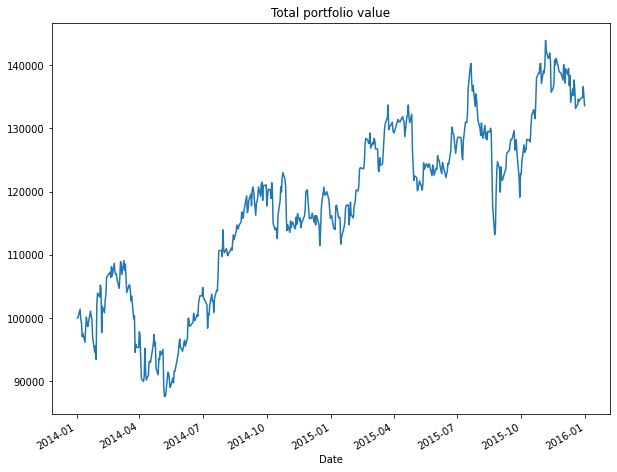

In [16]:
position_values['Total position value'].plot(figsize=(10,8))
plt.title('Total portfolio value')

So by the end of the term, the value o fmoney is at approximately 13 lakhs.

The stock position values can be plotted individually too to understand how the stocks grew.

<AxesSubplot:xlabel='Date'>

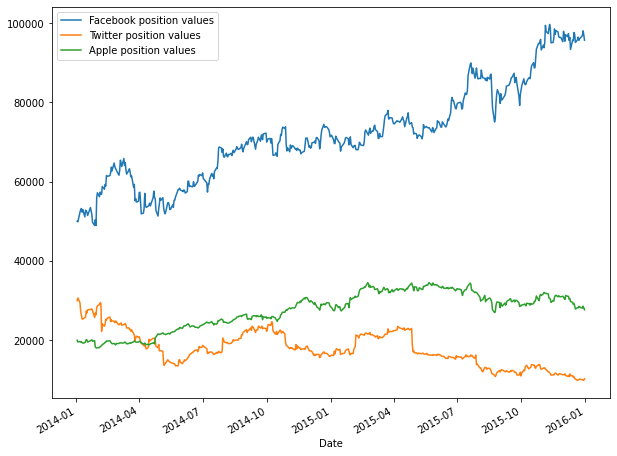

In [17]:
position_values.drop('Total position value',axis=1).plot(figsize=(10,8))

So the stock of facebook has grown in an upward trend whereas the other two stocks didnt have much variance.

## Portfolio statistics

Various statistics like daily returns, average daily retirns and standard deviation can be calculated. These statistics can help determine the sharpe ratio too.

In [18]:
position_values.head()

,Facebook position values,Twitter position values,Apple position values,Total position value
Date,,,,
2014-01-02,50000.000000,30000.000000,20000.000000,100000.000000
2014-01-03,49860.171815,30666.666667,19560.681937,100087.520419
2014-01-06,52275.635167,29462.222222,19667.347640,101405.205029
2014-01-07,52933.650155,27315.555556,19526.603149,99775.808860
2014-01-08,53216.962164,26351.111111,19650.353443,99218.426718


To calculate the daily return the pandas function 'pct_change' will be used. It calculates the percentage change between the current and a prior element. The periods to shift is 1.

In [20]:
position_values['Daily return'] = position_values['Total position value'].pct_change(1)
position_values.head()

,Facebook position values,Twitter position values,Apple position values,Total position value,Daily return
Date,,,,,
2014-01-02,50000.000000,30000.000000,20000.000000,100000.000000,NaN
2014-01-03,49860.171815,30666.666667,19560.681937,100087.520419,0.000875
2014-01-06,52275.635167,29462.222222,19667.347640,101405.205029,0.013165
2014-01-07,52933.650155,27315.555556,19526.603149,99775.808860,-0.016068
2014-01-08,53216.962164,26351.111111,19650.353443,99218.426718,-0.005586


The average daily return can be found by calling the mean() function on the daily returns.

In [21]:
position_values['Daily return'].mean()

0.0007122766289206966

The standard deviation can be caluclated by calling the 'std()' function on daily returns.

In [22]:
position_values['Daily return'].std()

0.01651000095519752

## Sharpe ratio
The sharpe ratio is the the average return received wrt the risk free rate per unit of volatility. Volatility is the fluctuations in the price of a portfolio. The sharpe ratio helps determine the return on an investment when compared to its risk.

The greater the value of the Sharpe ratio, the more attractive the risk-adjusted return.

The risk free rate per unit is considered to be 0 here.

In [23]:
sharpe_r = position_values['Daily return'].mean()/position_values['Daily return'].std()
sharpe_r

0.04314213129687704

The annual sharpe ratio can be calculated by multiplying 'k' value with the sharpe ratio. The 'k' value is the root of the number of business days. There are 252 days where trade business is carried out and therefore k=252.

In [24]:
annual_sharpe_r = sharpe_r * (252**0.5)
annual_sharpe_r

0.6848601026449987

A sharpe ration greater than 1 is generally accepted to be a good value. A ratio higher than 2 is great and higher than 3 is excellent. 